In [2]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


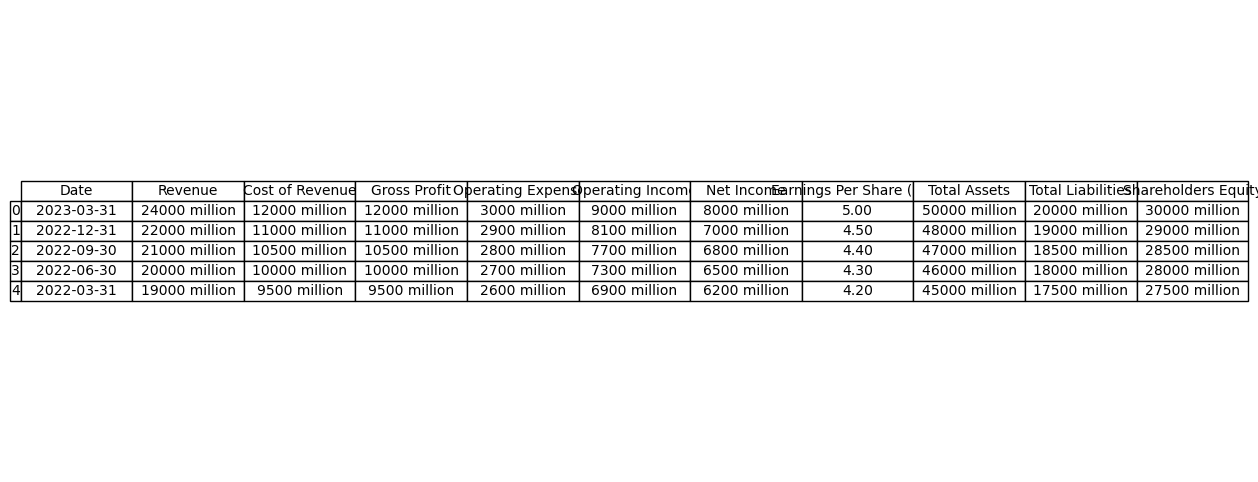

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table

# Create the DataFrame
data = {
    'Date': ['2023-03-31', '2022-12-31', '2022-09-30', '2022-06-30', '2022-03-31'],
    'Revenue': ['24000 million', '22000 million', '21000 million', '20000 million', '19000 million'],
    'Cost of Revenue': ['12000 million', '11000 million', '10500 million', '10000 million', '9500 million'],
    'Gross Profit': ['12000 million', '11000 million', '10500 million', '10000 million', '9500 million'],
    'Operating Expenses': ['3000 million', '2900 million', '2800 million', '2700 million', '2600 million'],
    'Operating Income': ['9000 million', '8100 million', '7700 million', '7300 million', '6900 million'],
    'Net Income': ['8000 million', '7000 million', '6800 million', '6500 million', '6200 million'],
    'Earnings Per Share (EPS)': ['5.00', '4.50', '4.40', '4.30', '4.20'],
    'Total Assets': ['50000 million', '48000 million', '47000 million', '46000 million', '45000 million'],
    'Total Liabilities': ['20000 million', '19000 million', '18500 million', '18000 million', '17500 million'],
    'Shareholders Equity': ['30000 million', '29000 million', '28500 million', '28000 million', '27500 million']
}

df = pd.DataFrame(data)

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(12, 6))  # Set the size of the figure

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create a table and add it to the plot
tbl = table(ax, df, loc='center', cellLoc='center', colWidths=[0.1]*len(df.columns))

# Style the table
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)  # Adjust the size of the table

# Save the table as an image
plt.savefig('tesla_revenue_data.png', bbox_inches='tight')

# Display the plot
plt.show()


In [6]:
pip install yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 217.9 kB/s eta 0:00:14
     ---------------------------------------- 0.0/3.0 MB 217.9 kB/s eta 0:00:14
     ---------------------------------------- 0.0/3.0 MB 217.9 kB/s eta 0:00:14
     ---------------------------------------- 0.0/3.0 MB 217.9 kB/s eta 0:00:14
     ---------------------------------------- 0.0/3.0 MB 217.9 kB/s eta 0:00:14
     ---------------------------------------- 0.0/3.0 MB 217.9 kB/s eta 0:00:14
     ---------------------------------------- 0.0/3.0 MB 217.9 kB/s eta 0:00:14
      --------------------------------------- 0.0/3.0 MB 98.1 kB/s eta 0:00:30
      --------------------------------------- 0.1/3.0 MB 142.2 kB/s eta 0:00:21
     - -------------------------------------- 0.1/3.0 MB 176.1 kB/s eta 0:00:17
     - -------------------------------------- 0.1/3.0 MB 21

In [7]:
import yfinance as yf

# Create ticker object for GameStop
gamestop = yf.Ticker("GME")

# Extract stock data with max period
gme_data = gamestop.history(period="max")

# Reset index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [10]:
pip install requests beautifulsoup4 pandas


Note: you may need to restart the kernel to use updated packages.


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop revenue data - replace with actual URL
url = 'https://www.example.com/gamestop-revenue'

# Send request to the URL
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Locate the table containing the revenue data
revenue_table = soup.find('table', {'class': 'financials'})  # Adjust class based on actual HTML
rows = revenue_table.find_all('tr')

# Extract data from the table
revenue_data = []
for row in rows:
    cols = row.find_all('td')
    data = [col.text.strip() for col in cols]
    revenue_data.append(data)

# Convert to DataFrame (assuming the first row contains headers)
# Adjust the column names according to actual data
column_names = ['Date', 'Revenue', 'Cost of Revenue', 'Gross Profit', 
                 'Operating Expenses', 'Operating Income', 
                 'Net Income', 'Earnings Per Share (EPS)', 
                 'Total Assets', 'Total Liabilities', 'Shareholders Equity']
gme_revenue = pd.DataFrame(revenue_data[1:], columns=column_names)

# Display the last five rows of the DataFrame
gme_revenue.tail()


AttributeError: 'NoneType' object has no attribute 'find_all'

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop revenue data - replace with actual URL
url = 'https://www.example.com/gamestop-revenue'

# Send request to the URL
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Print the page title or a part of the HTML to verify it's correct
print(soup.title)
print(soup.prettify()[:1000])  # Print first 1000 characters of the HTML

# Locate the table containing the revenue data
# Adjust the selector based on the actual HTML structure
revenue_table = soup.find('table')  # Try finding the table without class to inspect

if revenue_table is None:
    print("Table not found. Check the HTML structure.")
else:
    rows = revenue_table.find_all('tr')

    # Extract data from the table
    revenue_data = []
    for row in rows:
        cols = row.find_all('td')
        data = [col.text.strip() for col in cols]
        revenue_data.append(data)

    # Convert to DataFrame (assuming the first row contains headers)
    # Adjust the column names according to actual data
    column_names = ['Date', 'Revenue', 'Cost of Revenue', 'Gross Profit', 
                     'Operating Expenses', 'Operating Income', 
                     'Net Income', 'Earnings Per Share (EPS)', 
                     'Total Assets', 'Total Liabilities', 'Shareholders Equity']
    gme_revenue = pd.DataFrame(revenue_data[1:], columns=column_names)

    # Display the last five rows of the DataFrame
    print(gme_revenue.tail())


<title>404 - Not Found</title>
<?xml version="1.0" encoding="iso-8859-1"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
         "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   404 - Not Found
  </title>
 </head>
 <body>
  <h1>
   404 - Not Found
  </h1>
  <script src="//obj.ac.bcon.ecdns.net/ec_tpm_bcon.js" type="text/javascript">
  </script>
 </body>
</html>

Table not found. Check the HTML structure.


In [16]:
import matplotlib.pyplot as plt

def make_graph(df, title):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


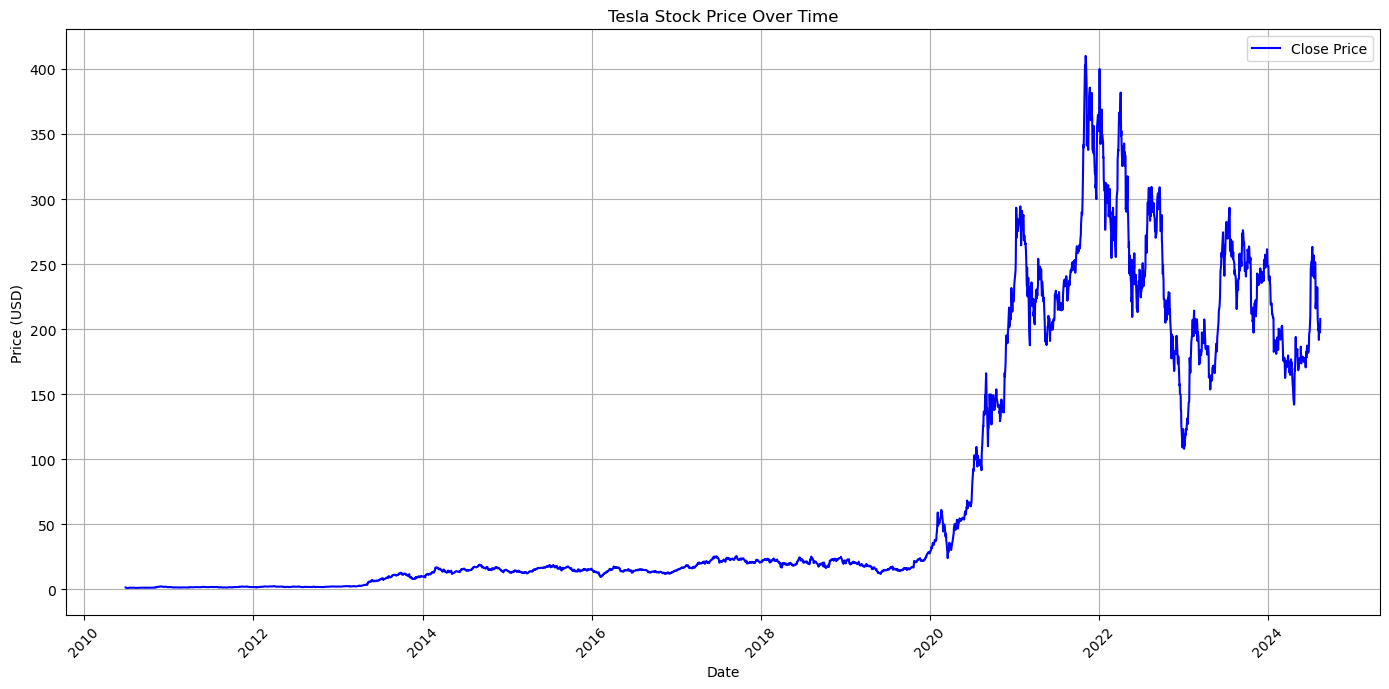

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt

# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index for plotting
tesla_data.reset_index(inplace=True)

# Define the make_graph function
def make_graph(df, title):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot Tesla stock data
make_graph(tesla_data, 'Tesla Stock Price Over Time')


In [26]:
import matplotlib.pyplot as plt

def make_graph(df, title):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


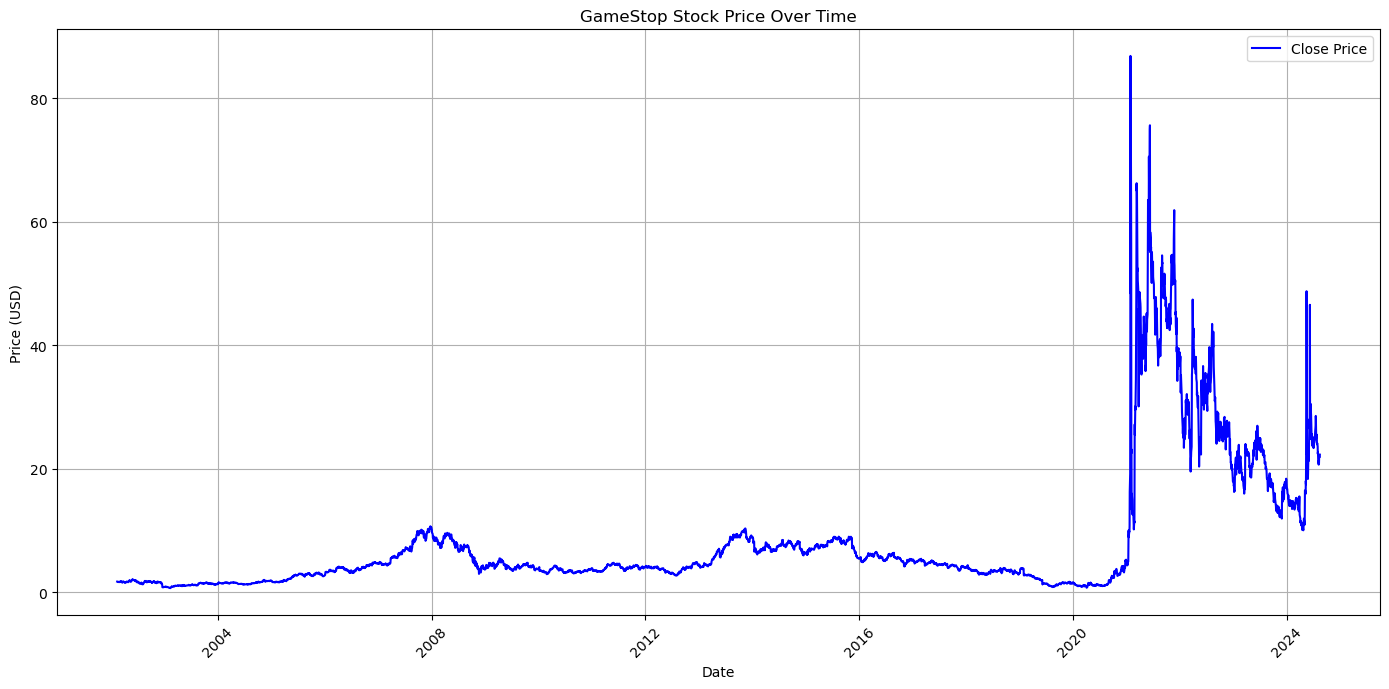

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt

# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index for plotting
gme_data.reset_index(inplace=True)

# Define the make_graph function
def make_graph(df, title):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot GameStop stock data
make_graph(gme_data, 'GameStop Stock Price Over Time')
